# About the Iris flower dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The iris data set is widely used as a beginner's dataset for machine learning purposes. The dataset is included in R base and Python in the machine learning library scikit-learn, so that users can access it without having to find a source for it.

**Attribute Information**

1. Sepal length in cm
2. sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Class - Iris Versicolor, Iris Setosa and Iris Virginica

# 1. Reading and Understanding Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris  #sklearn has iris dataset in-bulit

In [3]:
# read the dataset
iris = load_iris() 
iris = sns.load_dataset('iris') 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.shape

(150, 5)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [9]:
# frequency distribution of species
iris_species = pd.crosstab(index = iris['species'], columns = 'count')
iris_species

col_0,count
species,
setosa,50
versicolor,50
virginica,50


The iris flower dataset has 50 samples of each of the three flowers species.

# 2. Visualization of dataset

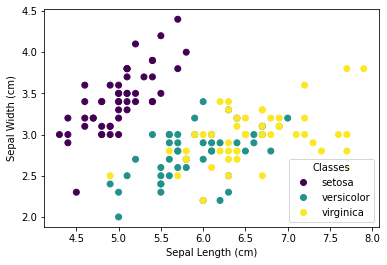

In [10]:
species_to_num = {'setosa': 0, 'versicolor':1, 'virginica':2}

_, ax = plt.subplots()
scatter = ax.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=iris['species'].map(species_to_num))
ax.set(xlabel='Sepal Length (cm)', ylabel='Sepal Width (cm)')
 
# Unpack the tuple returned by legend_elements() correctly
handles, labels = scatter.legend_elements()
_ = ax.legend(handles, species_to_num.keys(), loc="lower right", title="Classes")

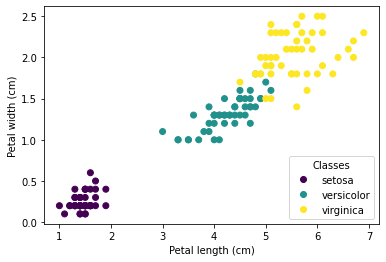

In [12]:
species_to_num = {'setosa': 0, 'versicolor':1, 'virginica':2}

_, ax = plt.subplots()
scatter = ax.scatter(iris.iloc[:, 2], iris.iloc[:, 3], c=iris['species'].map(species_to_num))
ax.set(xlabel='Petal length (cm)', ylabel='Petal width (cm)')
 
# Unpack the tuple returned by legend_elements() correctly
handles, labels = scatter.legend_elements()
_ = ax.legend(handles, species_to_num.keys(), loc="lower right", title="Classes")

Insights:
1. Each point in the scatter plot refers to one of the 150 iris flowers in the dataset, with the color indicating their respective type (Setosa, Versicolour, and Virginica). We can see a pattern regarding the Setosa type, which is easily identifiable based on its short and wide sepal, and short and narrow petals. 

2. Considering 2 dimensions, sepal width and length, there’s a overlap between the Versicolor and Virginica types.

3. Considering petal length and width there is a slight overlap between Versicolor and Virginica type. 

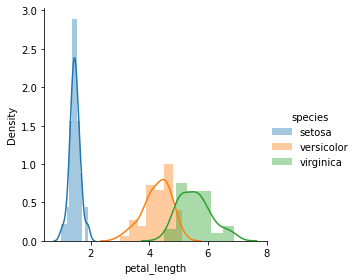

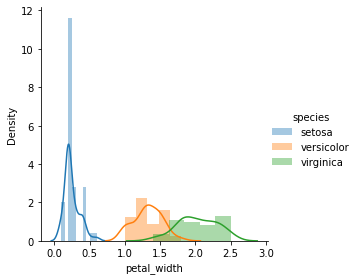

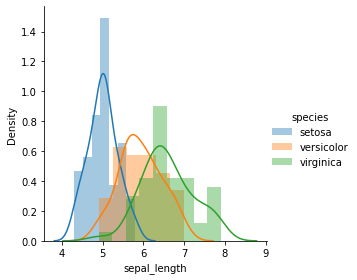

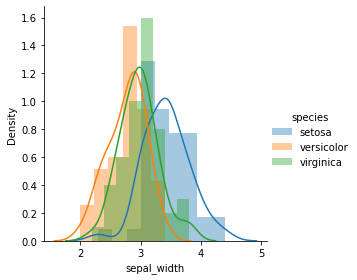

In [13]:
iris_setosa = iris.loc[iris["species"] == "setosa"] 
iris_virginica = iris.loc[iris["species"] == "virginica"] 
iris_versicolor = iris.loc[iris["species"] == "versicolor"] 

sns.FacetGrid(iris, hue="species", size=3).map(sns.distplot,"petal_length").add_legend() 

sns.FacetGrid(iris, hue="species", size=3).map(sns.distplot,"petal_width").add_legend() 

sns.FacetGrid(iris, hue="species", size=3).map(sns.distplot,"sepal_length").add_legend() 

sns.FacetGrid(iris, hue="species", size=3).map(sns.distplot,"sepal_width").add_legend() 

plt.show() 

Insights:
1. It seems feature Petal length properly differentiates  classes.
2. Hence  feature importance of petal length should be more.

# 3. Modelling

**What is unsupervised Machine Learning?**
- If you are training your machine learning task only with a set of inputs, it is called unsupervised learning, which will be able to find the structure or relationships between different inputs.

**Why are we using unsupervised ML for iris flower dataset?**
- The dataset contains 4 features for each of 3 species mentioned. With the help of unsupervised machine learning techniques it will be possible to find out optimum number of clusters in order to execute pattern recognition.

We will be using clustering technique in order understand pattern in the data. 
There are two popular types of clustering algorithm: 
1. K-means Clustering
2. Hierarchical Clustering

**Steps of K-means clustering**:
1. Choose the clusters K
2. Randomly select k centroids from the whole dataset
3. Assign all points to the closest cluster centroid
4. Recompute centroids again for new clusters
Now repeat steps 3 and 4 until centroids converge

**Finding optimum number of Clusters**

Considering all 4 features for K-means clustering

In [14]:
x = iris.iloc[:, :-1] #dropping categorical column species

In [15]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
wcss = [] 

from sklearn.cluster import KMeans

for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) 
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_) 

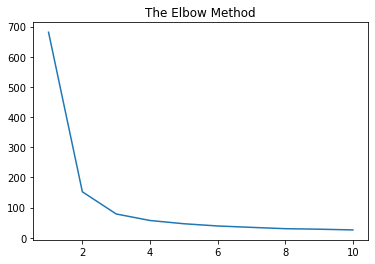

In [17]:
plt.title('The Elbow Method')
plt.plot(range(1,11),wcss)
plt.show()

The optimum number of clusters from above curve is 3. 

In [18]:
kmeans = KMeans(n_clusters=3,      # taking number of clusters = 3
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=0) 
y_kmeans = kmeans.fit_predict(x)

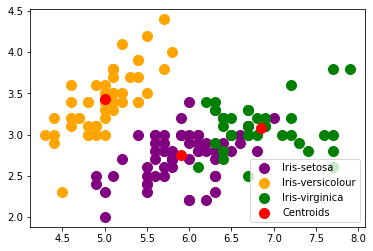

In [19]:
# Visualising the clusters 
cols = iris.columns 
plt.scatter(x.loc[y_kmeans == 0, cols[0]], x.loc[y_kmeans == 0, cols[1]], s=100, c='purple', label='Iris-setosa') 
plt.scatter(x.loc[y_kmeans == 1, cols[0]], x.loc[y_kmeans == 1, cols[1]], s=100, c='orange', label='Iris-versicolour') 
plt.scatter(x.loc[y_kmeans == 2, cols[0]], x.loc[y_kmeans == 2, cols[1]], s=100, c='green', label='Iris-virginica') 

# Plotting the centroids of the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids') 

plt.legend() 

**Accuracy and Performance of Model**

In [20]:
pd.crosstab(iris.species, y_kmeans) 

col_0,0,1,2
species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,14,0,36


As the algorithm is an unsupervised algorithm we don’t have test data here to check the performance of the model on it. 

Setosa class is clustered perfectly. While Versicolor has only 2 misclassifications.  

Class virginica is getting overlapped with Versicolor hence there is 14 misclassifications.

# Model Building using 3 features

In [21]:
x = iris.iloc[:, :-2]

In [22]:
x.head()

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [23]:
wcss = [] 

from sklearn.cluster import KMeans

for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) 
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_) 

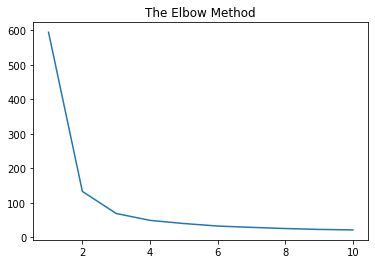

In [24]:
plt.title('The Elbow Method')
plt.plot(range(1,11),wcss)
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=0) 
y_kmeans = kmeans.fit_predict(x)

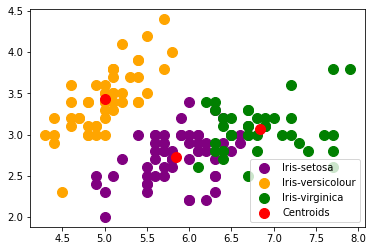

In [26]:
# Visualising the clusters 
cols = iris.columns 
plt.scatter(x.loc[y_kmeans == 0, cols[0]], x.loc[y_kmeans == 0, cols[1]], s=100, c='purple', label='Iris-setosa') 
plt.scatter(x.loc[y_kmeans == 1, cols[0]], x.loc[y_kmeans == 1, cols[1]], s=100, c='orange', label='Iris-versicolour') 
plt.scatter(x.loc[y_kmeans == 2, cols[0]], x.loc[y_kmeans == 2, cols[1]], s=100, c='green', label='Iris-virginica') 

# Plotting the centroids of the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids') 

plt.legend() 

In [27]:
pd.crosstab(iris.species, y_kmeans) 

col_0,0,1,2
species,,,
setosa,0,50,0
versicolor,45,0,5
virginica,13,0,37


After dropping sepal width in the k-means model building, it is found that, class setosa is clustered perfectly and not affected by the feature drop. Class versicolor shows 5 missclassfications; more compared previous model. Class virigica shows 13 missclassification; less compared to previous model version.

# Conclusion

The dataset can be divided into three clusters. 
One class i.e. Class Setosa is linearly seperable from other two. The other two classes are not linearly seperable. 